# Project Python Foundations: FoodHub Data Analysis

**Marks: 40**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [434]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

### Understanding the structure of the data

In [435]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns. Data in each row corresponds to the order placed by a customer.

* restaurant_name contains the name of the the restaurant for which the ordered was placed
* cuisine_type describes the type of food ordered
* rating is for each individual order
* The variables order_id, customer_id, cost_of_the_order, food_preparation_time, and delivery_time are numerical
* The variables restaurant_name, cuisine_type, day_of_the_week, and rating are categorical

### **Question 1:** Write the code to check the shape of the dataset and write your observations based on that. (0.5 mark)

In [436]:
df.shape #Outputs the dimensions of a dataset (rows by columns)

(1898, 9)

#### Observations: 
The DataFrame has a total of 1898 observations composed of 9 features describing each observation. 


### Question 2: Write the observations based on the below output from the info() method. (0.5 mark)

In [437]:
# use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
There are a total of 1898 entries/observations and 9 columns/features in the dataset. 

There is 3 different data types: 
1. float64(1)
    * cost_of_the_order
2. int64(4)
    * order_id, customer_id, food_preparation_time, delivery_time
3. object(4)
    * restaurant_name, cuisine_type, day_of_the_week, rating

A memory usage of 133.6+ KB.


### Question 3: 'restaurant_name', 'cuisine_type', 'day_of_the_week' are object types. Write the code to convert the mentioned features to 'category' and write your observations on the same. (0.5 mark)

In [438]:
# coverting "objects" to "category" reduces the data space required to store the dataframe
# write the code to convert 'restaurant_name', 'cuisine_type', 'day_of_the_week' into categorical data

for col in ['restaurant_name', 'cuisine_type', 'day_of_the_week']:
    df[col] = df[col].astype('category')

# use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   order_id               1898 non-null   int64   
 1   customer_id            1898 non-null   int64   
 2   restaurant_name        1898 non-null   category
 3   cuisine_type           1898 non-null   category
 4   cost_of_the_order      1898 non-null   float64 
 5   day_of_the_week        1898 non-null   category
 6   rating                 1898 non-null   object  
 7   food_preparation_time  1898 non-null   int64   
 8   delivery_time          1898 non-null   int64   
dtypes: category(3), float64(1), int64(4), object(1)
memory usage: 102.7+ KB


#### Observations:
Again there are still 1898 entries/observations and 9 columns/features in the dataframe. 

However, now there are 4 different data types. The data types include: 
1. categorical(3)
    * restaurant_name, cuisine_type, day_of_the_week
2. float64(1)
    * cost_of_the_order
3. int64(4)
    * order_id, customer_id, food_preparation_time, delivery_time
4. object(1)
    * rating

In converting 3 of the previous object features to categorical the memory usage now includes 102.7+ KB.

### **Question 4:** Write the code to find the summary statistics and write your observations based on that. (1 mark)

In [439]:
# write your code here
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:

* order costs range from about 4 to 35 USD with an average order cost of 16 USD. There is a 13 USD difference between the 3rd quartile and the maximum value of order cost which could indicate some outliers in the data. 

* food preparation and delivery time seem to be more normalized than order costs. However, the data indicates that FoodHub has more control over delivery times than food preparation times. The average food preparation time is about 27 minutes compared to the average delivery time of about 24 minutes.

### **Question 5:** How many orders are not rated? (0.5 mark)

In [440]:
df.rating.unique()

array(['Not given', '5', '3', '4'], dtype=object)

In [441]:
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations:
736 FoodHub orders were not rated.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on the distributions of all the relevant variables in the dataset. (5 marks)

In [596]:
plt.figure(figsize = (250,75))
sns.countplot(data = df, x = 'customer_id')

<AxesSubplot:xlabel='customer_id', ylabel='count'>

In [599]:
df['customer_id'].nunique()

1200

In [646]:
df['customer_id'].value_counts().unique()

array([13, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1])

#### Observations:
* There is a total of **1200** unique FoodHub customers. 
* Among these customers there is an order count range of **1 - 13**. 

In [654]:
array = df['customer_id'].value_counts()
array1 = pd.DataFrame(array)
array1.value_counts()

customer_id
1              784
2              267
3               83
4               33
5               19
6                6
7                4
8                1
9                1
10               1
13               1
dtype: int64

#### Observations:
The majority of customers have only just made **one purchase**.

In [660]:
d = {'Order Count': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 13], 'Num of Customers': [784, 267, 83, 33, 19, 6, 4, 1, 1, 1, 1]}
freq = pd.DataFrame(data = d)
freq

,Order Count,Num of Customers
0,1,784
1,2,267
2,3,83
3,4,33
4,5,19
5,6,6
6,7,4
7,8,1
8,9,1
9,10,1


<AxesSubplot:xlabel='restaurant_name', ylabel='count'>

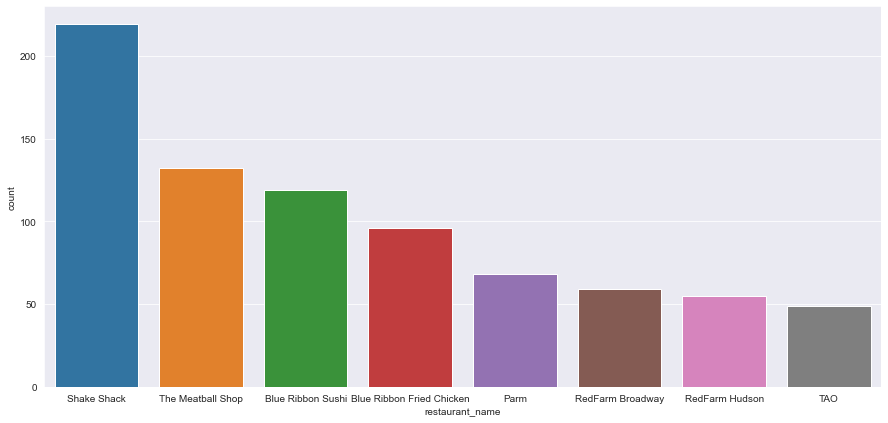

In [472]:
plt.subplots(figsize = (15,7))
sns.countplot(data = df, x = 'restaurant_name', order = df.restaurant_name.value_counts().iloc[:8].index)

#### Observations:
The top restaurant is **Shake Shack** with over 200 orders placed. Followed by:

2. The Meatball Shop
3. Blue Ribbon Sushi
4. Blue Ribbon Fried Chicken
5. Parm

<AxesSubplot:xlabel='cuisine_type', ylabel='count'>

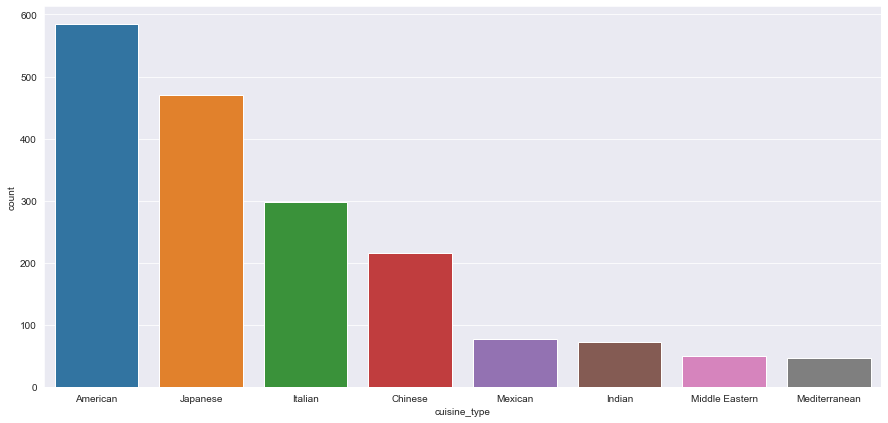

In [669]:
plt.subplots(figsize = (15,7))
sns.countplot(data = df, x = 'cuisine_type', order = df.cuisine_type.value_counts().iloc[:8].index)

#### Observations:
The top cuisine type is **American** with over 500 orders placed. The other top cuisine types with over 200 orders placed are:

2. Japanese
3. Italian
4. Chinese

<AxesSubplot:xlabel='cost_of_the_order', ylabel='Count'>

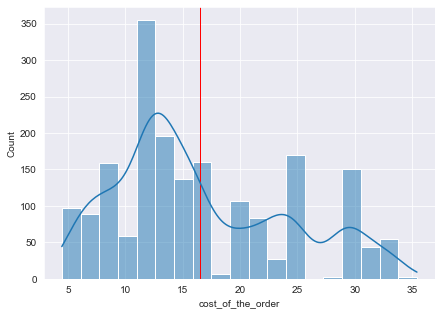

In [489]:
plt.figure(figsize = (7,5))
plt.axvline(df['cost_of_the_order'].mean(), color='r', linewidth=1)
sns.histplot(data = df, x = 'cost_of_the_order', kde = True)

<AxesSubplot:xlabel='cost_of_the_order'>

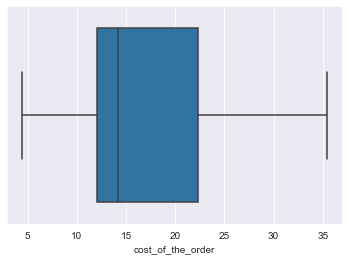

In [482]:
sns.boxplot(data = df, x = 'cost_of_the_order')

#### Observations:
From both the histogram and box plot, it can be inferred that 'cost_of_the_order' is right-skewed.

1. The histogram shows a long right tail and the mean is also to the right of the peak.
2. The box plot shows a longer right whisker.

The *average* FoodHub order cost is about **16 USD**. Whereas, the *majority* of the FoodHub order cost ranges from **11 - 13 USD**.



<AxesSubplot:xlabel='day_of_the_week', ylabel='count'>

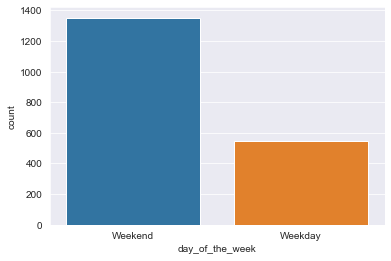

In [70]:
sns.countplot(data = df, x = 'day_of_the_week')

In [494]:
df['day_of_the_week'].value_counts()

Weekend    1351
Weekday     547
Name: day_of_the_week, dtype: int64

In [499]:
#Find the percentages
((1351/1898)*100)

71.18018967334035

In [500]:
((547/1898)*100)

28.81981032665964

#### Observations:
The majority of FoodHub orders are placed on the weekend.
1. Weekend - 71% of all orders
2. Weekday - 29% of all orders

<AxesSubplot:xlabel='rating', ylabel='count'>

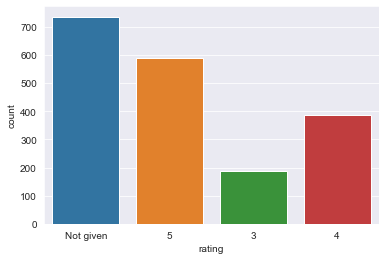

In [67]:
sns.countplot(data = df, x = 'rating')

#### Observations:
Most FoodHub orders placed provided no rating. However, orders with ratings range from 3-5 with the majority given a 5 point rating.

<AxesSubplot:xlabel='food_preparation_time', ylabel='Count'>

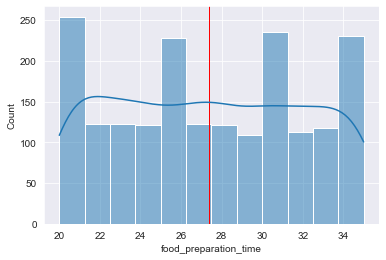

In [502]:
# plt.figure(figsize = (10,7))
plt.axvline(df['food_preparation_time'].mean(), color='r', linewidth=1)
sns.histplot(data = df, x = 'food_preparation_time', kde = True)

<AxesSubplot:xlabel='food_preparation_time'>

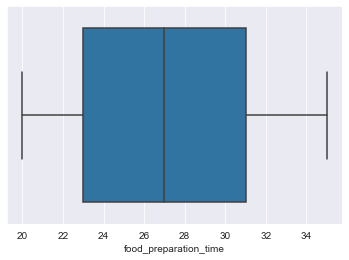

In [61]:
sns.boxplot(data = df, x = 'food_preparation_time')

#### Observations:
* Food preparation time seems to follow a normal distribution with a minimum of 20 minutes and maximum of 35 minutes.
* The average food preparation time falls at just about 27 minutes. 
* However, the distribution does not have a well defined bell curve with a sharp peak. 

In [504]:
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


<AxesSubplot:xlabel='delivery_time', ylabel='Count'>

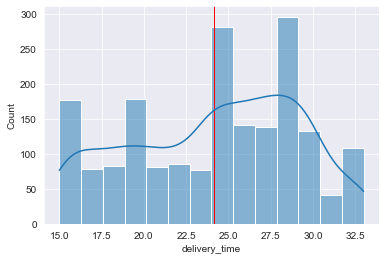

In [507]:
# plt.subplots(figsize = (7,7))
plt.axvline(df['delivery_time'].mean(), color='r', linewidth=1)
sns.histplot(data = df, x = 'delivery_time', kde = True)

<AxesSubplot:xlabel='delivery_time'>

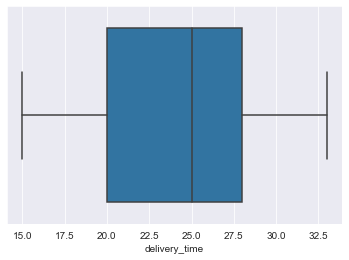

In [508]:
sns.boxplot(data = df, x = 'delivery_time')

#### Observations:
From the histogram it can be inferred that 'delivery_time' is somewhat left-skewed.

1. The histogram shows a long left tail and the mean is also to the left of the peak.

### Question 7: Write the code to find the top 5 restaurants that have received the highest number of orders. (1 mark)

In [442]:
# write the code here
df['restaurant_name'].value_counts().head()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations:
1. **Shake Shack** is the most popular restaurant for FoodHub orders.
2. The Meatball Shop
3. Blue Ribbon Sushi
4. Blue Ribbon Fried Chicken
5. Parm

### Question 8: Write the code to find the most popular cuisine on weekends. (1 mark)

In [510]:
# write the code here
df.groupby(['day_of_the_week'])['cuisine_type'].value_counts()

day_of_the_week  cuisine_type  
Weekday          American          169
                 Japanese          135
                 Italian            91
                 Chinese            52
                 Indian             24
                 Mexican            24
                 Middle Eastern     17
                 Mediterranean      14
                 Southern            6
                 French              5
                 Thai                4
                 Vietnamese          3
                 Korean              2
                 Spanish             1
Weekend          American          415
                 Japanese          335
                 Italian           207
                 Chinese           163
                 Mexican            53
                 Indian             49
                 Mediterranean      32
                 Middle Eastern     32
                 Thai               15
                 French             13
                 Korean         

#### Observations:
1. **American** cuisine is the most popular on the weekends. Followed by the cuisine types:
2. Japanese
3. Italian
4. Chinese
5. Mexican

### Question 9: Write the code to find the number of total orders where the cost is above 20 dollars. What is the percentage of such orders in the dataset?  (1 mark)

In [444]:
# write the code here
col = df['cost_of_the_order']
sum = 0
for i in col:
    if (i > 20):
        sum = sum + 1
print('The total number of orders with a cost over 20 USD:', sum)
print('Percentage of such orders in the dataset:', "{:.1f}".format(sum/len(df['cost_of_the_order'])*100))

The total number of orders with a cost over 20 USD: 555
Percentage of such orders in the dataset: 29.2


#### Observations:
There is a total of 555 FoodHub orders where the total order cost is above 20 USD.
That accounts for about 29.2% of the dataset.

### Question 10: Write the code to find the mean delivery time based on this dataset. (1 mark)

In [680]:
# write the code here
round(df['delivery_time'].mean(), 2) #Calls the series "delivery_time" from the dataframe "df" and finds the mean delivery time.

24.16

#### Observations:
The mean delivery time based on this dataset is about 24 minutes.

### Question 11: Suppose the company has decided to give a free coupon of 15 dollars to the customer who has spent the maximum amount on a single order. Write the code to find the ID of the customer along with the order details. (1 mark)

In [446]:
# prints the entire observation(row) for which its value for "cost_of_the_order" is equal to the maximum
df[df.cost_of_the_order == df.cost_of_the_order.max()]

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
573,1477814,62359,Pylos,Mediterranean,35.41,Weekday,4,21,29


#### Observations:
* customer_id: **62359** is the customer who spent the maximum amount on a single order and will be given a free 15 USD coupon. The total cost of the order was of **35.41 USD**.

* The restaurant they ordered from is called **Pylos** with a cuisine type of **Mediterranean**.

* Furthermore, the order was placed during a **weekday**. The food preparation time totaled **21 minutes**, whereas the delivery time totaled **29 minutes**.

* At the end, the customer provided FoodHub with a rating of **4**.

### Multivariate Analysis

### Question 12: Perform bivariate/multivariate analysis to explore relationships between the important variables in the dataset. (7 marks)

In [528]:
df.corr()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
order_id,1.000000,-0.013960,0.021171,-0.007026,0.009690
customer_id,-0.013960,1.000000,-0.001322,-0.030330,-0.009885
cost_of_the_order,0.021171,-0.001322,1.000000,0.041527,-0.029949
food_preparation_time,-0.007026,-0.030330,0.041527,1.000000,0.011094
delivery_time,0.009690,-0.009885,-0.029949,0.011094,1.000000


#### Observations:
No significant results.

In [532]:
df.cov()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
order_id,300358.500000,-8.698972e+05,86.831165,-17.836584,26.406695
customer_id,-869897.183975,1.292727e+10,-1124.477642,-15974.761597,-5588.932456
cost_of_the_order,86.831165,-1.124478e+03,56.007444,1.439700,-1.114537
food_preparation_time,-17.836584,-1.597476e+04,1.439700,21.459878,0.255564
delivery_time,26.406695,-5.588932e+03,-1.114537,0.255564,24.727118


#### Observations:
No signficant results.

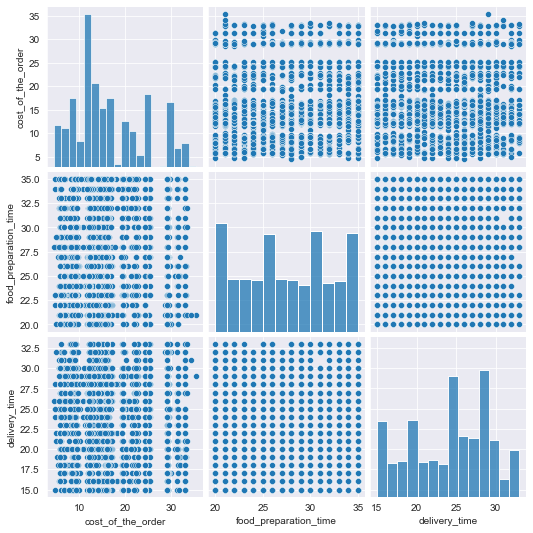

In [559]:
sns.pairplot(data = df[['cost_of_the_order', 'food_preparation_time', 'delivery_time']])

#### Observations:
There are no numeric variables that share a linear relationship.

<AxesSubplot:xlabel='restaurant_name', ylabel='cost_of_the_order'>

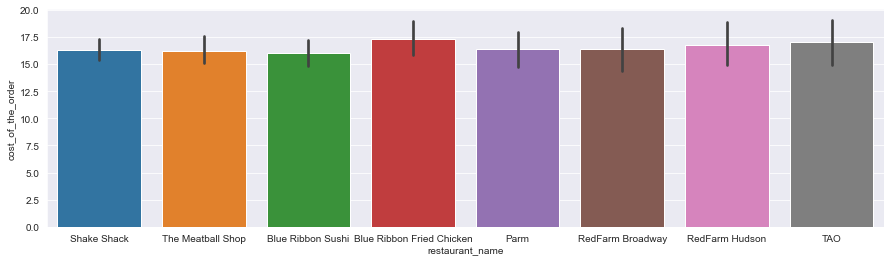

In [676]:
plt.figure(figsize = (15,4))
sns.barplot(data = df, x = 'restaurant_name', y = 'cost_of_the_order', 
            order = df.restaurant_name.value_counts().iloc[:8].index)

#### Observations:
These are the top restaurants with the highest mean order costs.

<AxesSubplot:xlabel='cuisine_type', ylabel='cost_of_the_order'>

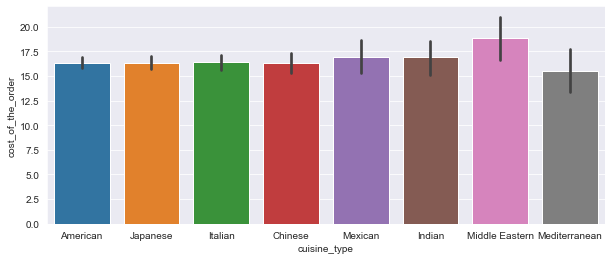

In [673]:
plt.figure(figsize = (10,4))
sns.barplot(data = df, x = 'cuisine_type', y = 'cost_of_the_order', 
            order = df.cuisine_type.value_counts().iloc[:8].index)

#### Observations:
These are the top cuisine types with the highest mean order costs.

<AxesSubplot:xlabel='cuisine_type', ylabel='count'>

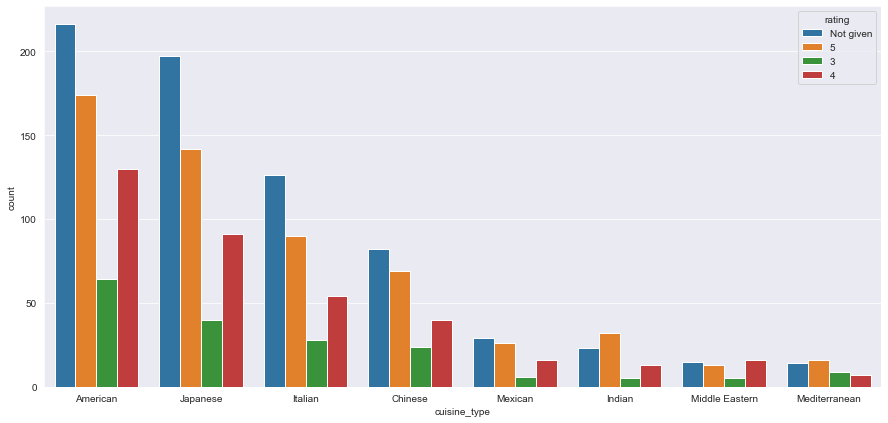

In [569]:
plt.figure(figsize = (15,7))
sns.countplot(data = df, x = 'cuisine_type', hue = 'rating', order = df.cuisine_type.value_counts().iloc[:8].index)

#### Observations:
* *Cuisine types* **American, Japanese, Italian, and Chinese** are the top 4 highly rated.

<AxesSubplot:xlabel='cuisine_type', ylabel='count'>

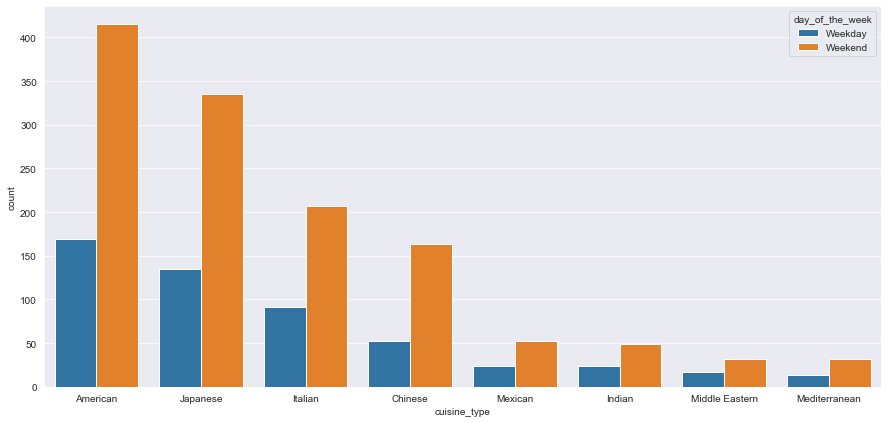

In [567]:
plt.figure(figsize = (15,7))
sns.countplot(data = df, x = 'cuisine_type', hue = 'day_of_the_week', order = df.cuisine_type.value_counts().iloc[:8].index)

* **Day of the week** has no influence over the selection of *cuisine type*.

* **American, Japanese, Italian, and Chinese** cuisine types remain the most popular throughout the entire week.

In [614]:
df.groupby(['day_of_the_week'])['cost_of_the_order'].mean()


day_of_the_week
Weekday    16.311188
Weekend    16.574833
Name: cost_of_the_order, dtype: float64

<AxesSubplot:xlabel='day_of_the_week', ylabel='cost_of_the_order'>

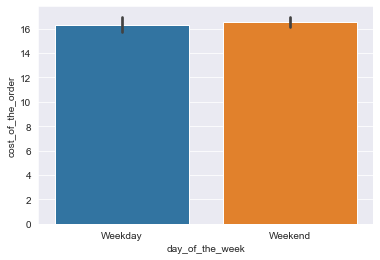

In [613]:
sns.barplot(data = df, x = 'day_of_the_week', y = 'cost_of_the_order')

#### Observations:
The mean order cost is slightly **higher** on the weekends.

<AxesSubplot:xlabel='day_of_the_week', ylabel='delivery_time'>

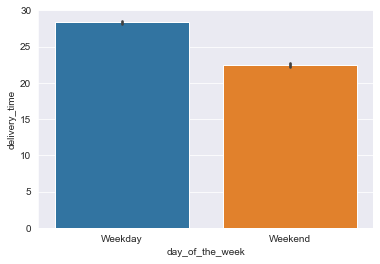

In [666]:
sns.barplot(data = df, x = 'day_of_the_week', y = 'delivery_time')

In [667]:
df.groupby(['day_of_the_week'])['delivery_time'].mean()

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64

#### Observations:
On average delivery times are higher during the weekday than on the weekend.
1. Weekday - 28 minutes
2. Weekend - 22 minutes

<AxesSubplot:xlabel='cost_of_the_order', ylabel='Count'>

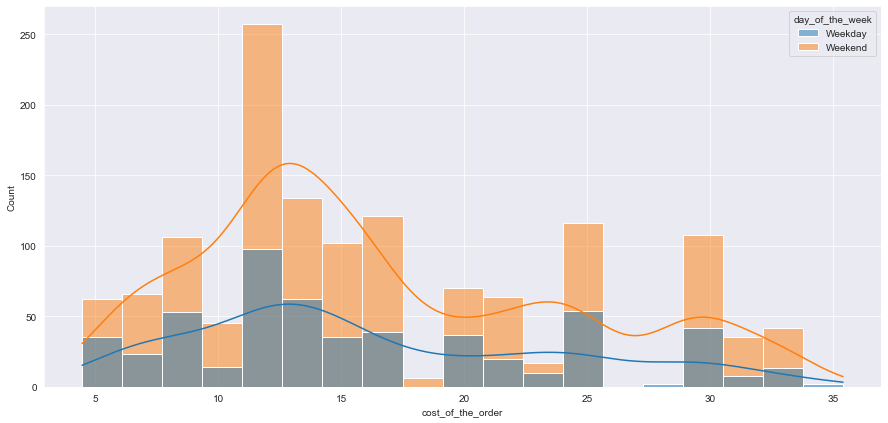

In [578]:
plt.figure(figsize = (15,7))
sns.histplot(data = df, x = 'cost_of_the_order', hue = 'day_of_the_week', kde = True)

#### Observations:
* This *order cost* histogram with the *day of the week* highlights a strong customer demographic which places most orders on the weekend.

In [607]:
df.groupby(['rating'])['cost_of_the_order'].mean()

rating
3            16.223351
4            16.710337
5            16.965697
Not given    16.085340
Name: cost_of_the_order, dtype: float64

<AxesSubplot:xlabel='rating', ylabel='cost_of_the_order'>

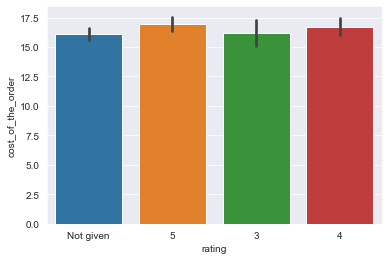

In [615]:
sns.barplot(data = df, x = 'rating', y = 'cost_of_the_order')

#### Observations:
**Higher ratings** (customer experience) do indicate a **higher mean order cost**.

<AxesSubplot:xlabel='cost_of_the_order', ylabel='Count'>

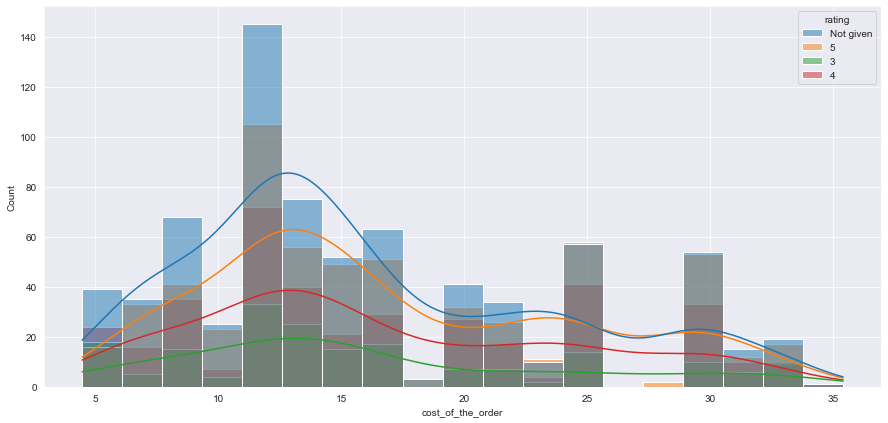

In [580]:
plt.figure(figsize = (15,7))
sns.histplot(data = df, x = 'cost_of_the_order', hue = 'rating', kde = True)

#### Observations:
* Again, most of the FoodHub population has *order costs* at about **11 USD** with the most ratings provided by this same cluster of customers. 

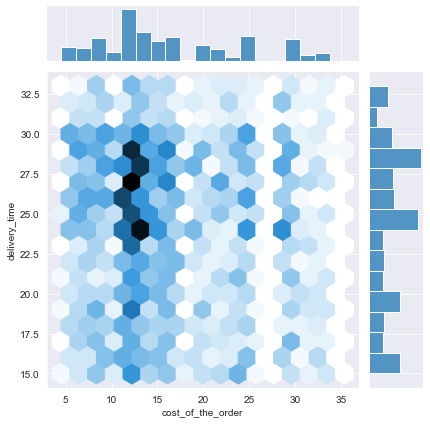

In [562]:
sns.jointplot(data = df, x = 'cost_of_the_order', y = 'delivery_time', kind = 'hex')

#### Observations:
* *Order costs* are densely populated at about **11 USD** within a range of about **24 - 30 minutes** *delivery time*.

### Question 13: Suppose the company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Write the code to find the restaurants fulfilling the criteria to get the promotional offer. (2 marks)

In [447]:
df1 = df.drop(df.index[(df['rating'] != '3') & (df['rating'] != '4') & (df['rating'] != '5')])
df1

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30
...,...,...,...,...,...,...,...,...,...
1889,1478190,94152,RedFarm Broadway,Chinese,8.68,Weekday,3,33,30
1890,1477316,164776,TAO,Japanese,15.67,Weekend,5,20,22
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19


In [448]:
df1['restaurant_name'].value_counts() > 50

Shake Shack                   True
The Meatball Shop             True
Blue Ribbon Sushi             True
Blue Ribbon Fried Chicken     True
RedFarm Broadway             False
                             ...  
Market Table                 False
Paul & Jimmy's               False
Room Service                 False
Rohm Thai                    False
Lamarca Pasta                False
Name: restaurant_name, Length: 178, dtype: bool

In [449]:
df2 = df1.drop(df1.index[(df1['restaurant_name'] != 'Shake Shack')
                   &(df1['restaurant_name'] != 'Blue Ribbon Fried Chicken')
                   &(df1['restaurant_name'] != 'The Meatball Shop')
                   &(df1['restaurant_name'] != 'Blue Ribbon Sushi')])
df2

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
12,1476966,129969,Blue Ribbon Fried Chicken,American,24.30,Weekend,5,23,17
15,1477414,66222,Shake Shack,American,16.20,Weekend,5,33,25
19,1477354,67487,Blue Ribbon Sushi,Japanese,16.20,Weekend,4,35,26
22,1478287,150599,Shake Shack,American,29.10,Weekday,5,21,30
...,...,...,...,...,...,...,...,...,...
1880,1477466,222734,Shake Shack,American,13.97,Weekend,5,35,27
1884,1477437,304993,Shake Shack,American,31.43,Weekend,3,31,24
1885,1477550,97324,Shake Shack,American,29.05,Weekday,4,27,29
1886,1478277,48282,The Meatball Shop,American,14.50,Weekend,5,34,25


In [450]:
for col in ['rating']:
    df2[col] = df2[col].astype('int')

In [451]:
df2.groupby('restaurant_name')['rating'].mean().sort_values(ascending = False).head()

restaurant_name
The Meatball Shop            4.511905
Blue Ribbon Fried Chicken    4.328125
Shake Shack                  4.278195
Blue Ribbon Sushi            4.219178
'wichcraft                        NaN
Name: rating, dtype: float64

#### Observations:
Only 4 restaurants meet the requirements to qualify for the promotional offer. 

They all have more than 50 rating count and have an average rating greater than 4. 

1. The Meatball Shop
2. Blue Ribbon Fried Chicken
3. Shake Shack
4. Blue Ribbon Sushi

**The Meatball Shop** is the highest rated restaurant with an average rating of **4.5**

### Question 14: Suppose the company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Write the code to find the net revenue generated on all the orders given in the dataset. (2 marks)

In [452]:
# write the code here
sum = 0
for i in df['cost_of_the_order']:
    if (i > 20):
        sum = sum + (i*0.25)
    elif (5 < i < 20):
        sum = sum + (i*0.15)
    else:
        sum = sum + (i*0)
print('The net revenue on all orders is:', "{:.2f}".format(sum))

The net revenue on all orders is: 6166.30


#### Observations:
The net revenue on all orders totals an amount of **6,166.30 USD**

### Question 15: Suppose the company wants to analyze the total time required to deliver the food. Write the code to find out the percentage of orders that have more than 60 minutes of total delivery time. (2 marks)

Note: The total delivery time is the summation of the food preparation time and delivery time. 

In [453]:
# write the code here
total_delivery_time = df['food_preparation_time'] + df['delivery_time']

sum = 0
for i in total_delivery_time:
    if i > 60:
        sum = sum + 1
print('Percentage:', '{:.2f}%'.format(sum/len(total_delivery_time)*100))

Percentage: 10.54%


#### Observations:
FoodHub orders that exceed a total delivery time of 60 minutes account for **10.54%** of all orders. 

### Question 16: Suppose the company wants to analyze the delivery time of the orders on weekdays and weekends. Write the code to find the mean delivery time on weekdays and weekends. Write your observations on the results. (2 marks)

In [454]:
# write the code here
df.groupby(['day_of_the_week'])['delivery_time'].mean()

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64

#### Observations:
The average delivery time on weekdays is greater than during the weekend. Some reasons why this is the case may include:
1. Traffic conditions/congestion during the weekday is worst than on the weekend.
2. Fewer FoodHub delivery employees during the weekday.

### Conclusion and Recommendations

### **Question 17:** Write the conclusions and business recommendations derived from the analysis. (5 marks)

#### Insights

**Conclusion:**

Observation A - The majority of FoodHub customers approximately 65% (784 customers) have only placed *ONE* single order. Followed by the second highest population approximately 22% (267 customers) which has only placed *TWO* orders. 

| Order Count | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 13 |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | 
| Frequency | 784 | 267 | 83 | 33 | 19 | 6 | 4 | 1 | 1 | 1 | 1 |

Observation B - Only three restaurants cross the 100 orders mark, while other restaurants barely cross the 50 orders mark.

| Shake Shack | The Meatball Shop | Blue Ribbon Sushi | Blue Ribbon Fried Chicken | Parm |
| --- | --- | --- | --- | --- |
| 219 | 132 | 119 | 96 | 68 |


| American | Japanese | Italian | Chinese | Mexican |
| --- | --- | --- | --- | --- |
| 584 | 470 | 298 | 215 | 77 |

Observation C - The majority of FoodHub orders were placed during the weekend 

| Weekday | Weekend | 
| --- | --- | 
| 1351 | 547 |

**Recommendations:**

Suggestion A - For customers who ordered less than 3 times in *undisclosed time-period*, efforts have to be made to understand their customer experience to identify what stopped them from ordering more often. Identifying root causes will help focus efforts more effectively.

1. Offer incentives for feedback
2. Include post-order feedback

For customers who place orders more frequently, the primary goal would be to increase their monetary. In others words, have these customers spend more money. One approach could be to add on a *Recommended Extras List* towards the end of the ordering process. Maybe even provide some customer testimonials as to why the recommend you should buy a certain sauce or appetizer among other things.

Suggestion B - Certain restaurants and cuisine types experienced a high number of FoodHub order requests while others did not. Some of the reasons behind this observation may include:

1. Food quality
2. Niche cuisine type
3. Packaging quality
4. Newly introduced restaurant/cuisine type on the FoodHub ordering app

Customer feedback and/or more information would be needed to identify significant root causes.Any root cause related to poor food or packaging quality, restaurants are to be notified and advised to improve their practices. A niche cuisine type related root cause may be improved by conducting a cost-benefit analysis on the underperforming restaurants and proceeding from there. For newly introduced restaurants/cuisine types FoodHub might want to pitch ads or push notifications.

Suggestion C - Since the majority of FoodHub orders are placed during the weekend, FoodHub needs to analyze the demand/supply of delivery workers. This will help improve customer experience by facilitating delivery times.

Also, given that weekend customers are the biggest population size focus on increasing their order cost when placing a FoodHub order. For weekday customers FoodHub should consider analyzing their delivery locations to identify if this customer is ordering in from work or home, this way marketing strategies can be developed for both customers.

Preferably, more data would have facilitated this EDA however with the data given some strategies were developed. If more data had been provided a customer segmentation model would have provided more detailed customer types which could help focus marketing strategies more effectively. 

In [665]:
df.groupby(['day_of_the_week'])['delivery_time'].mean()

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64

In [655]:
df['day_of_the_week'].value_counts()

Weekend    1351
Weekday     547
Name: day_of_the_week, dtype: int64

In [658]:
df['restaurant_name'].value_counts().head(10)

Shake Shack                      219
The Meatball Shop                132
Blue Ribbon Sushi                119
Blue Ribbon Fried Chicken         96
Parm                              68
RedFarm Broadway                  59
RedFarm Hudson                    55
TAO                               49
Han Dynasty                       46
Blue Ribbon Sushi Bar & Grill     44
Name: restaurant_name, dtype: int64

In [657]:
df['cuisine_type'].value_counts()

American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: cuisine_type, dtype: int64